# General

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from countries import get_country_list
import numpy as np

## Constants

In [2]:
TEMP_DATA = 'data/climate/temperature_data_1991_2016.csv'
RAIN_DATA = 'data/climate/rain_data_1991_2016.csv'
OUTPUT_PATH = 'data/climate/climate_features.csv'

# Temperature Data

## Load and Transform Data

In [3]:
data_temp = pd.read_csv(
    TEMP_DATA,
    sep=',',
    names=['Temperature', 'Year', 'Statistics', 'Country', 'ISO_Country',
           '_']).drop(0)
data_temp['Month'] = data_temp['Statistics'].apply(lambda x: x.split()[0])
data_temp['Country'] = data_temp['Country'].apply(lambda x: x.lstrip())
data_temp['Temperature'] = data_temp['Temperature'].astype(float)
data_temp['Year'] = data_temp['Year'].astype(int)
data_temp = data_temp[['Temperature', 'Year', 'Month', 'Country']]

## Overview

In [4]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61152 entries, 1 to 61152
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  61152 non-null  float64
 1   Year         61152 non-null  int64  
 2   Month        61152 non-null  object 
 3   Country      61152 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


### Temperature

count    61152.000000
mean        19.224302
std         10.136161
min        -30.859000
25%         13.824000
50%         23.322650
75%         26.244025
max         38.566900
Name: Temperature, dtype: float64

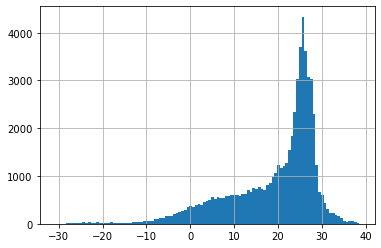

In [5]:
data_temp['Temperature'].hist(bins='auto')
data_temp['Temperature'].describe()

### Year

In [6]:
display(data_temp['Year'].describe())
data_temp['Year'].value_counts()

count    61152.000000
mean      2003.500000
std          7.500061
min       1991.000000
25%       1997.000000
50%       2003.500000
75%       2010.000000
max       2016.000000
Name: Year, dtype: float64

2015    2352
2014    2352
1991    2352
1992    2352
1993    2352
1994    2352
1995    2352
1996    2352
1997    2352
1998    2352
1999    2352
2000    2352
2001    2352
2002    2352
2003    2352
2004    2352
2005    2352
2006    2352
2007    2352
2008    2352
2009    2352
2010    2352
2011    2352
2012    2352
2013    2352
2016    2352
Name: Year, dtype: int64

### Month

In [7]:
display(data_temp['Month'].describe())
data_temp['Month'].value_counts()

count     61152
unique       12
top         Jun
freq       5096
Name: Month, dtype: object

Jun    5096
Feb    5096
May    5096
Apr    5096
Dec    5096
Oct    5096
Jul    5096
Nov    5096
Aug    5096
Sep    5096
Jan    5096
Mar    5096
Name: Month, dtype: int64

### Country

In [8]:
display(data_temp['Country'].describe())
data_temp['Country'].unique()

count     61152
unique      195
top       Korea
freq        624
Name: Country, dtype: object

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Democratic Republic of the)', 'Congo (Republic of the)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Federated States of Micronesia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'G

#### Check if data contains all Countries we have in our country list

In [9]:
set(get_country_list()).difference(set(data_temp['Country'].unique()))

{'Slovak Republic'}

--> Slovakia has to be renamed to Slovak Republic

In [10]:
data_temp.loc[data_temp['Country'] == 'Slovakia', 'Country'] = 'Slovak Republic'
set(get_country_list()).difference(set(data_temp['Country'].unique()))

set()

# Rainfall Data

## Load and Transform Data

In [11]:
data_rain = pd.read_csv(RAIN_DATA, sep=',',
    names=['Rainfall', 'Year', 'Statistics', 'Country', 'ISO_Country',
           '_']).drop(0)
data_rain['Rainfall'] = data_rain['Rainfall'].astype(float)
data_rain['Month'] = data_rain['Statistics'].apply(lambda x: x.split()[0])
data_rain['Country'] = data_rain['Country'].apply(lambda x: x.lstrip())
data_rain['Year'] = data_rain['Year'].astype(int)

## Overview

In [12]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61152 entries, 1 to 61152
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rainfall     61152 non-null  float64
 1   Year         61152 non-null  int64  
 2   Statistics   61152 non-null  object 
 3   Country      61152 non-null  object 
 4   ISO_Country  61152 non-null  object 
 5   _            1560 non-null   object 
 6   Month        61152 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.7+ MB


### Rainfall

count    61152.000000
mean       103.581125
std        114.130057
min          0.000000
25%         24.123175
50%         66.192300
75%        149.172000
max       2699.190000
Name: Rainfall, dtype: float64

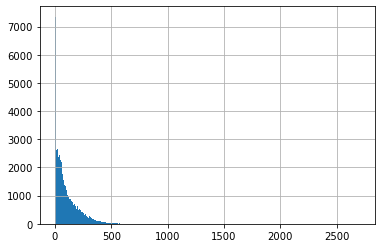

In [13]:
data_rain['Rainfall'].hist(bins='auto')
data_rain['Rainfall'].describe()

### Year

In [14]:
display(data_rain['Year'].describe())
data_rain['Year'].value_counts()

count    61152.000000
mean      2003.500000
std          7.500061
min       1991.000000
25%       1997.000000
50%       2003.500000
75%       2010.000000
max       2016.000000
Name: Year, dtype: float64

2015    2352
2014    2352
1991    2352
1992    2352
1993    2352
1994    2352
1995    2352
1996    2352
1997    2352
1998    2352
1999    2352
2000    2352
2001    2352
2002    2352
2003    2352
2004    2352
2005    2352
2006    2352
2007    2352
2008    2352
2009    2352
2010    2352
2011    2352
2012    2352
2013    2352
2016    2352
Name: Year, dtype: int64

### Month

In [15]:
display(data_rain['Month'].describe())
data_rain['Month'].value_counts()

count     61152
unique       12
top         Jun
freq       5096
Name: Month, dtype: object

Jun    5096
Feb    5096
May    5096
Apr    5096
Dec    5096
Oct    5096
Jul    5096
Nov    5096
Aug    5096
Sep    5096
Jan    5096
Mar    5096
Name: Month, dtype: int64

### Country

In [16]:
display(data_rain['Country'].describe())
data_rain['Country'].unique()

count     61152
unique      195
top       Korea
freq        624
Name: Country, dtype: object

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Democratic Republic of the)', 'Congo (Republic of the)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Federated States of Micronesia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'G

#### Check if data contains all Countries we have in our country list

In [17]:
set(get_country_list()).difference(set(data_rain['Country'].unique()))

{'Slovak Republic'}

--> Slovakia has to be renamed to Slovak Republic

In [18]:
data_rain.loc[data_rain['Country'] == 'Slovakia', 'Country'] = 'Slovak Republic'
set(get_country_list()).difference(set(data_rain['Country'].unique()))

set()

# Merge Datasets

## Check if Countries, Years and Months are identical

In [19]:
country_temp = set(data_temp['Country'].unique())
country_rain = set(data_rain['Country'].unique())
country_temp == country_rain

True

In [20]:
year_temp = set(data_temp['Year'].unique())
year_rain = set(data_rain['Year'].unique())
year_temp == year_rain

True

In [21]:
month_temp = set(data_temp['Month'].unique())
month_rain = set(data_rain['Month'].unique())
month_temp == month_rain

True

## Merge

In [22]:
data_full = data_temp.merge(data_rain)

# Show change over time for all countries averaged

### GroupBy Year and Country

In [23]:
by_year = data_full.groupby(['Year', 'Country']).agg(np.mean).reset_index()

In [24]:
by_year

,Year,Country,Temperature,Rainfall
0,1991,Afghanistan,12.894488,36.287492
1,1991,Albania,11.037649,76.489067
2,1991,Algeria,22.513458,7.344397
3,1991,Andorra,11.188148,63.093025
4,1991,Angola,21.716883,84.832217
...,...,...,...,...
5065,2016,Venezuela,26.478200,153.725275
5066,2016,Vietnam,25.073158,165.738483
5067,2016,Yemen,24.221200,14.290114
5068,2016,Zambia,22.737050,66.956508


### Only show OECD Countries

In [25]:
by_year = by_year[by_year['Country'].isin(get_country_list())]

### Plot Average Temperature by Country over Time

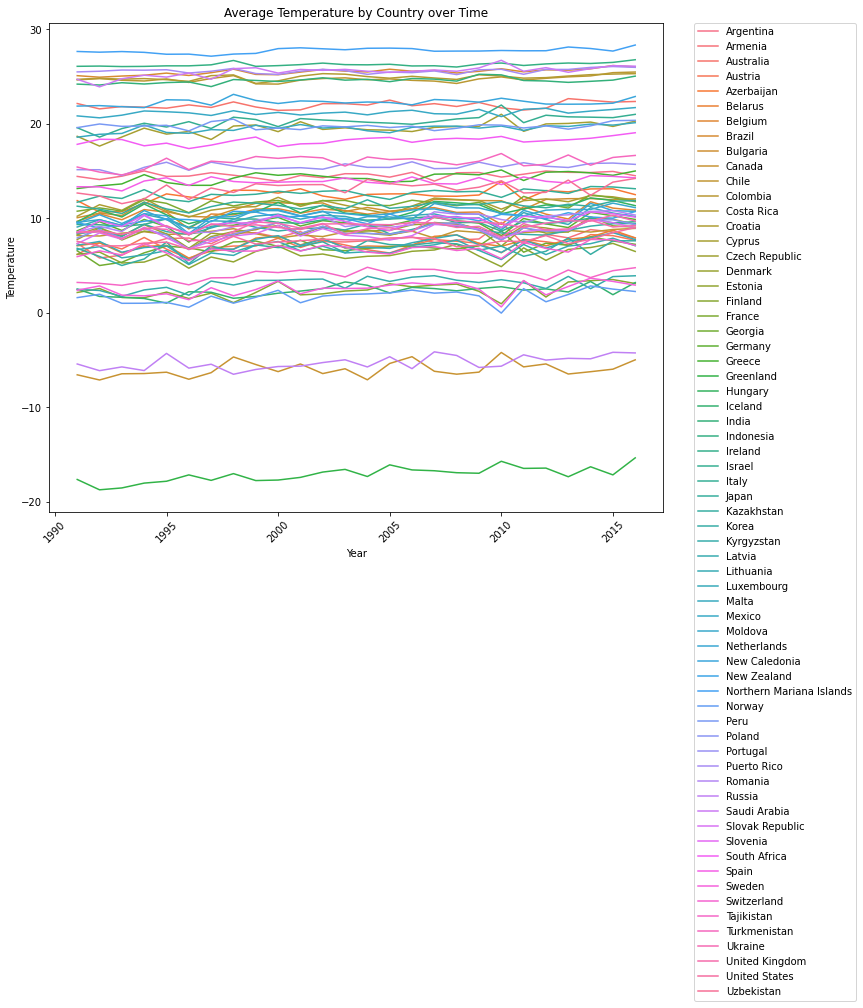

In [26]:
fig, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Average Temperature by Country over Time')

sns.lineplot(data=by_year.reset_index(),
             x='Year',
             y='Temperature',
             hue='Country')
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Plot Average Rainfall by Country over Time

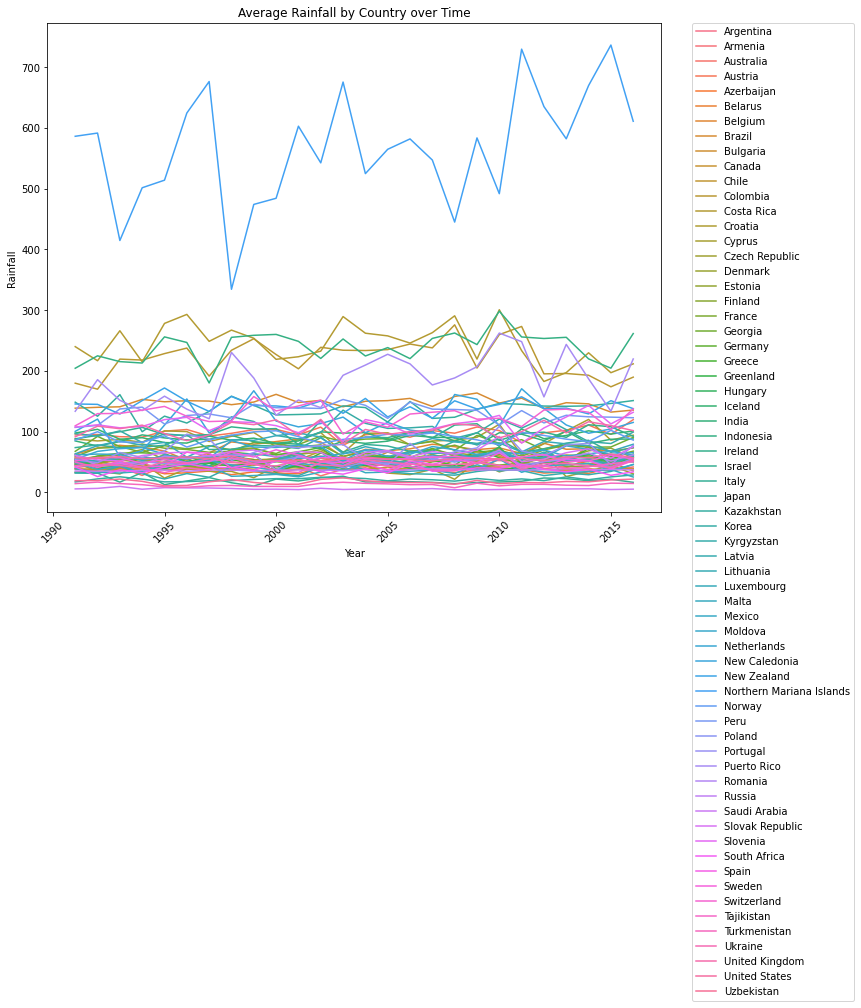

In [27]:
fig, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Average Rainfall by Country over Time')

sns.lineplot(data=by_year.reset_index(),
             x='Year',
             y='Rainfall',
             hue='Country')
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# Extract Temperature Features

In [28]:
features = pd.DataFrame(data_full['Country'].unique(), columns=['Country'])

In [29]:
def extract_slope(x, y):
    m, b = np.polyfit(x, y, 1)
    return m

In [30]:
def extract_gain_percentage(country_df, past_years=1):

    min_year = country_df['Year'].min()
    start_mean_temp = country_df[country_df['Year'] ==
                                 min_year]['Temperature'].mean()

    max_year = country_df['Year'].max()

    past_years_mean_temp = country_df[country_df['Year'] > (
        max_year - past_years)]['Temperature'].mean()

    return (past_years_mean_temp / start_mean_temp - 1) * 100

In [31]:
def extract_difference(country_df, past_years=1):
    min_year = country_df['Year'].min()
    start_mean_temp = country_df[country_df['Year'] ==
                                 min_year]['Temperature'].mean()

    max_year = country_df['Year'].max()

    past_years_mean_temp = country_df[country_df['Year'] > (
        max_year - past_years)]['Temperature'].mean()

    return past_years_mean_temp - start_mean_temp 

In [32]:
for country in features['Country'].unique():
    sel_c = data_full.loc[data_full['Country'] == country, :]
    
    ## extract temperature slope
    features.loc[features['Country'] == country,
                 'temp_slope'] = extract_slope(sel_c['Year'],
                                               sel_c['Temperature'])
    ## extract temperature gain percentage
    features.loc[features['Country'] == country,
                 'gain_percentage'] = extract_gain_percentage(sel_c)
    
    ## extract temperature difference
    features.loc[features['Country'] == country,
                 'temp_difference'] = extract_difference(sel_c)
    
    

In [33]:
features.to_csv(OUTPUT_PATH, index=False)